Project 4241
Google Play Store
Takes the dataset produced by the file data.ipynb and continues to preprocess it for data exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                    cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            confusion_matrix, classification_report, roc_curve,
                            roc_auc_score, precision_recall_curve, auc)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [28]:
# read in the cleaned dataset
df = pd.read_csv('google_play_apps.csv')

In [29]:
df.head()

,title,description,descriptionHTML,summary,realInstalls,score,ratings,reviews,price,free,...,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,version,minInAppProductPrice,maxInAppProductPrice,age,installsPerMonth
0,Candy Crush Saga,Explore a world full of delicious match-3 puzz...,Explore a world full of delicious match-3 puzz...,Match your way through candy puzzles packed wi...,1974480219,4.618176,38834040.0,2109270.0,0.0,True,...,Everyone,True,True,2012-11-15,"Jun 12, 2025",1.305.0.1,0.99,149.99,153,1.290510e+07
1,Roblox,Roblox is the ultimate virtual universe that l...,Roblox is the ultimate virtual universe that l...,Your next adventure awaits.,1252864778,4.462343,43720501.0,3520743.0,0.0,True,...,Diverse Content: Discretion Advised,False,False,2014-07-15,"Jun 26, 2025",2.678.751,0.50,199.99,133,9.420036e+06
2,Mob Control,"🌟 Lead, Multiply, and Conquer! Mob Control del...","🌟 Lead, Multiply, and Conquer! Mob Control del...","Join Mob Control: Grow your army, lead your mo...",180814603,4.164065,717423.0,35391.0,0.0,True,...,Mild Fantasy Violence,False,False,2021-04-29,"Jun 25, 2025",2.89.3,0.84,399.99,50,3.616292e+06
3,Subway Surfers,DASH as fast as you can! \r\nDODGE the oncomin...,DASH as fast as you can! <br>DODGE the oncomin...,"Help Jake, Tricky & Fresh escape from the grum...",2630557369,4.559105,42025857.0,1792287.0,0.0,True,...,Fantasy Violence,True,True,2012-09-20,"Jun 23, 2025",3.48.2,0.99,99.99,155,1.697134e+07
4,Offline Games - No Wifi Games,Get ready for 'Offline Games': fun for all age...,Get ready for &#39;Offline Games&#39;: fun for...,Choose from lots of puzzles and minigames to p...,138333421,4.713331,302139.0,9428.0,0.0,True,...,Everyone,True,True,2023-08-04,"May 22, 2025",3.1.2,1.99,10.99,23,6.014497e+06


In [30]:
# drop the descriptionHTML column
df.drop(columns=['descriptionHTML'], inplace=True)  
# drop the contentRatingDescription column
df.drop(columns=['contentRatingDescription'], inplace=True) 
# Drop the genre column
df.drop(columns=['genre'], inplace=True) 
# drop the currency column
# df.drop(columns=['currency'], inplace=True)

# what is the count of values in the free column?   
free_counts = df['free'].value_counts()
print(free_counts)

# what is the count of values in the price column?
price_counts = df['price'].value_counts()
print(price_counts)

# drop the rows with False in the free column
df = df[df['free'] == True] 

# how many rows have values in the adSupported column that do not match the containsAd column?
ad_mismatch = df[df['adSupported'] != df['containsAds']]
print(f"Number of rows with ad mismatch: {len(ad_mismatch)}")

# drop the adSupported column
df.drop(columns=['adSupported'], inplace=True) 

# convert the ratings column to ratings per month
# df['ratingsPerMonth'] = df['ratings'] / df['age'] 
# convert the reviews column to reviews per month
# df['reviewsPerMonth'] = df['reviews'] / df['age']
# drop the ratings and reviews columns
df.drop(columns=['ratings', 'reviews'], inplace=True) 

# because there are only free apps, we can drop the price column
df.drop(columns=['price'], inplace=True)

# and the free column
df.drop(columns=['free'], inplace=True)

# because no apps are on sale, drop the sale column
df.drop(columns=['sale'], inplace=True) 

# because all the apps are in USD, we can drop the currency column
df.drop(columns=['currency'], inplace=True)









free
True     309
False      2
Name: count, dtype: int64
price
0.00     309
14.99      1
21.99      1
Name: count, dtype: int64
Number of rows with ad mismatch: 0


In [31]:
# what are the unique values in the version column?
unique_versions = df['version'].unique()
print(f"Unique versions: {unique_versions}") 

# how many values in the version column begin with 20xx?
version_20xx_count = df['version'].str.startswith('20').sum()
print(f"Number of versions starting with '20xx': {version_20xx_count}") 

# what are the unique values in the version column that begin with 20xx?
version_20xx_values = df['version'][df['version'].str.startswith('20')].unique()
print(f"Unique versions starting with '20xx': {version_20xx_values}")  

# split the version column where there is a space
df[['version_number', 'version_suffix']] = df['version'].str.split(' ', n=1, expand=True)

Unique versions: ['1.305.0.1' '2.678.751' '2.89.3' '3.48.2' '3.1.2' '1.122.0' '3.8.1'
 '2025.6.10' '56.9.3' '8.4.0i' '3.6.3' '3.81.0' '7.3.8' '5.21.3' '3.2.5'
 'Varies with device' '7.4.0' '1.111.1' '3.28.2' '14.56' '1.15.1288'
 '25.0.03' '1.110.2' '12.8.4' '62.256' '7.7.3' '12.230' '0.87.5' '1.228.0'
 '29667' '1.2025.154' '1.0.772404132' '4.91.1' '1.6.8' '1.9.5' '2.48.2'
 '6.90.0.2506120000' '0.6.3105' '2025.06.16.771977109.1-release' '18.17.2'
 '30.0.430625003' '1.250602.7' '16.0.18730.20110' '2.5.16' '430.2.2'
 '1.26.758697344 (724317)' '2.2.3d' '25.26.0' '1.2.3' '25.05.26+2160'
 '0.5.25' '13.1.1' '7.1.18' '4.2.8' '10.0.0' '3.3.4' '2.318.0' '1.3.8'
 '4.0.8' '11.4.222-773718806.1-release' '2025.05.2' '1.5.2' '3.4.5'
 '2.19.2' '28.2.0' '4.9.8' '4.31.6' '3.16.4' '2.6.0' '5.1.10' '6.5.1'
 '2.107987.0' '1.69.0' '178.0' '1.2507604.7001' '3.5.9' '1.0.37' '6.52'
 '1.8.7' 'Lifestyle 3.1' '3.0.2' '1.4' '1.1.4' '11.4' '1.21.6' '9.0.0'
 '3.1.9' '1.8.0' '1.93.1' '5.0.0' '1.0' '2.4.7' '2.0.0' '1.

In [32]:
# what are the unique values in the version_suffix column?
unique_version_suffixes = df['version_suffix'].unique()
print(f"Unique version suffixes: {unique_version_suffixes}")   

# replace the values in the version_suffix if they are not '3.1' with 0
df['version_suffix'] = df['version_suffix'].replace(to_replace=r'^(?!3\.1$).*', value=0, regex=True)

unique_version_suffixes = df['version_suffix'].unique()
print(f"Unique version suffixes: {unique_version_suffixes}") 

# what is the value of the version_number column where the version_suffix is '3.1'?
version_number_3_1 = df[df['version_suffix'] == '3.1']['version_number'].unique()
print(f"Version numbers where version_suffix is '3.1': {version_number_3_1}")

# what are all the column values in the row where the version_suffix is '3.1'?
version_3_1_row = df[df['version_suffix'] == '3.1']
print(f"Row where version_suffix is '3.1':\n{version_3_1_row}")

# set the value of the version_number column in the row where the version is 'Lifestyle 3.1' to '3.1'
df.loc[df['version'] == 'Lifestyle 3.1', 'version_number'] = '3.1'

# drop the version_suffix column
df.drop(columns=['version_suffix'], inplace=True)

Unique version suffixes: [None 'with device' '(724317)' '3.1' 'Free']
Unique version suffixes: [None 0 '3.1']
Version numbers where version_suffix is '3.1': ['Lifestyle']
Row where version_suffix is '3.1':
        title                                        description  \
97  Lifestyle  Embrace a healthier, more sustainable lifestyl...   

                                              summary  realInstalls  score  \
97  Empower your well-being and the planet with Li...           134    0.0   

    offersIAP             genreId  \
97      False  HEALTH_AND_FITNESS   

                                           categories contentRating  \
97  [{'name': 'Health & Fitness', 'id': 'HEALTH_AN...      Everyone   

    containsAds    released lastUpdatedOn        version  \
97        False  2023-05-25   May 4, 2024  Lifestyle 3.1   

    minInAppProductPrice maxInAppProductPrice  age  installsPerMonth  \
97                   0.0                  0.0   25              5.36   

   version_numbe

In [33]:
# what are the unique values in the version_number column that begin with 20xx?
version_number_20xx = df['version_number'][df['version_number'].str.startswith('20')].unique()
print(f"Unique version numbers starting with '20xx': {version_number_20xx}")    

Unique version numbers starting with '20xx': ['2025.6.10' '2025.06.16.771977109.1-release' '2025.05.2' '2025.06.24.0'
 '2025.05.29.00.release' '20.1.5' '2025.25.0']


In [34]:
# for any values in the version_number column that begin with 2025, set the value to 0
df['version_number'] = df['version_number'].replace(to_replace=r'^(2025).*', value=0, regex=True)

# for any values in the version_number column that are 0, set the value to '0'
df['version_number'] = df['version_number'].replace(to_replace=0, value='0')

# split the version_number column where there is a '.' and only keep the first two parts
df['version_number'] = df['version_number'].str.split('.', n=2).str[:2].str.join('.')   



In [35]:
# what are the unique values in the version_number column?
unique_version_numbers = df['version_number'].unique()
print(f"Unique version numbers: {unique_version_numbers}")  
# sort the unique version numbers
unique_version_numbers.sort()
print(f"Sorted unique version numbers: {unique_version_numbers}")
# set the values of the version_number column to '0' if the value is 'Varies'
df['version_number'] = df['version_number'].replace(to_replace='Varies', value='0')
# remove the leading 'v' from values in the version_number column
df['version_number'] = df['version_number'].str.replace('v', '', regex=False)

# split the version_number column into two columns, version_major and version_minor
df[['version_major', 'version_minor']] = df['version_number'].str.split('.', n=1, expand=True)

# convert the version_major column to numeric
df['version_major'] = pd.to_numeric(df['version_major'], errors='coerce')

# in the version_minor column, only keep the first two characters
df['version_minor'] = df['version_minor'].str[:2]   

# replace the null values in the version_minor column with 0
df['version_minor'] = df['version_minor'].replace(to_replace=np.nan, value='0')

# convert the version_minor column to numeric
df['version_minor'] = pd.to_numeric(df['version_minor'], errors='coerce')

# add a new column called total_updates that is the sum of the version_major and version_minor columns
df['total_updates'] = df['version_major'] + df['version_minor']

# get the number of updates per month
df['updatesPerMonth'] = df['total_updates'] / df['age'] 







Unique version numbers: ['1.305' '2.678' '2.89' '3.48' '3.1' '1.122' '3.8' '0' '56.9' '8.4' '3.6'
 '3.81' '7.3' '5.21' '3.2' 'Varies' '7.4' '1.111' '3.28' '14.56' '1.15'
 '25.0' '1.110' '12.8' '62.256' '7.7' '12.230' '0.87' '1.228' '29667'
 '1.2025' '1.0' '4.91' '1.6' '1.9' '2.48' '6.90' '0.6' '18.17' '30.0'
 '1.250602' '16.0' '2.5' '430.2' '1.26' '2.2' '25.26' '1.2' '25.05' '0.5'
 '13.1' '7.1' '4.2' '10.0' '3.3' '2.318' '1.3' '4.0' '11.4' '1.5' '3.4'
 '2.19' '28.2' '4.9' '4.31' '3.16' '2.6' '5.1' '6.5' '2.107987' '1.69'
 '178.0' '1.2507604' '3.5' '6.52' '1.8' '3.0' '1.4' '1.1' '1.21' '9.0'
 '1.93' '5.0' '2.4' '2.0' '3.23' '1.31' '1.121' '5.194' '8.3' '3.35' '4.8'
 '5.31' '7.56' '8.69' '8.44' '9.51' '2.50620' '5.3' '1.22' '1.70' '6.1'
 '1.12' '9.26' '2.24' '2506.2' '25.6' '0.4' '3.7' '15.0' '11.7' '2.1'
 '198' '4.64' '1.94' '1.7853' '2.17' '1.10' '12.7' '11.1' '25.2' '1.19'
 '2.7' '15.227' '3.34' '10.60' '11.29' '5.324' '34.0' '8.73' '3.30'
 '11.16' '6.100' '4.50' '5.7' '18.9' '11.15' 

In [36]:
# what are the columns in the dataframe?
print(f"Columns in the dataframe: {df.columns.tolist()}")       
# what are the data types of the columns in the dataframe?
print(f"Data types of the columns:\n{df.dtypes}") 

# what are the unique values in the maxInAppProductPrice column?
unique_max_in_app_product_prices = df['maxInAppProductPrice'].unique()
print(f"Unique max in-app product prices: {unique_max_in_app_product_prices}") 

# convert the maxInAppProductPrice column to numeric, setting errors='coerce' to handle non-numeric values
df['maxInAppProductPrice'] = pd.to_numeric(df['maxInAppProductPrice'], errors='coerce')

df.head()



Columns in the dataframe: ['title', 'description', 'summary', 'realInstalls', 'score', 'offersIAP', 'genreId', 'categories', 'contentRating', 'containsAds', 'released', 'lastUpdatedOn', 'version', 'minInAppProductPrice', 'maxInAppProductPrice', 'age', 'installsPerMonth', 'version_number', 'version_major', 'version_minor', 'total_updates', 'updatesPerMonth']
Data types of the columns:
title                    object
description              object
summary                  object
realInstalls              int64
score                   float64
offersIAP                  bool
genreId                  object
categories               object
contentRating            object
containsAds                bool
released                 object
lastUpdatedOn            object
version                  object
minInAppProductPrice    float64
maxInAppProductPrice     object
age                       int64
installsPerMonth        float64
version_number           object
version_major             int64
versi

,title,description,summary,realInstalls,score,offersIAP,genreId,categories,contentRating,containsAds,...,version,minInAppProductPrice,maxInAppProductPrice,age,installsPerMonth,version_number,version_major,version_minor,total_updates,updatesPerMonth
0,Candy Crush Saga,Explore a world full of delicious match-3 puzz...,Match your way through candy puzzles packed wi...,1974480219,4.618176,True,GAME_CASUAL,"[{'name': 'Puzzle', 'id': 'GAME_PUZZLE'}, {'na...",Everyone,True,...,1.305.0.1,0.99,149.99,153,1.290510e+07,1.305,1,30,31,0.202614
1,Roblox,Roblox is the ultimate virtual universe that l...,Your next adventure awaits.,1252864778,4.462343,True,GAME_ADVENTURE,"[{'name': 'Simulation', 'id': 'GAME_SIMULATION...",Teen,False,...,2.678.751,0.50,199.99,133,9.420036e+06,2.678,2,67,69,0.518797
2,Mob Control,"🌟 Lead, Multiply, and Conquer! Mob Control del...","Join Mob Control: Grow your army, lead your mo...",180814603,4.164065,True,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone,False,...,2.89.3,0.84,399.99,50,3.616292e+06,2.89,2,89,91,1.820000
3,Subway Surfers,DASH as fast as you can! \r\nDODGE the oncomin...,"Help Jake, Tricky & Fresh escape from the grum...",2630557369,4.559105,True,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone 10+,True,...,3.48.2,0.99,99.99,155,1.697134e+07,3.48,3,48,51,0.329032
4,Offline Games - No Wifi Games,Get ready for 'Offline Games': fun for all age...,Choose from lots of puzzles and minigames to p...,138333421,4.713331,True,GAME_CASUAL,"[{'name': 'Casual', 'id': 'GAME_CASUAL'}, {'na...",Everyone,True,...,3.1.2,1.99,10.99,23,6.014497e+06,3.1,3,1,4,0.173913


In [37]:
# examine and score the readability of the description column
# ! pip install textstat
import textstat

def analyze_readability(description):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(description),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(description),
        'automated_readability_index': textstat.automated_readability_index(description),
        'reading_time': textstat.reading_time(description)  # in seconds
    }

# Apply to your DataFrame
df['readability_score'] = df['description'].apply(lambda x: textstat.flesch_reading_ease(x) if pd.notna(x) else None)
df['grade_level'] = df['description'].apply(lambda x: textstat.flesch_kincaid_grade(x) if pd.notna(x) else None) 

# Rename to column 'readability_score' to 'description_readability_score'
df.rename(columns={'readability_score': 'description_readability_score'}, inplace=True)
# Rename to column 'grade_level' to 'description_grade_level'
df.rename(columns={'grade_level': 'description_grade_level'}, inplace=True)

# do the same for the summary column
df['summary_readability_score'] = df['summary'].apply(lambda x: textstat.flesch_reading_ease(x) if pd.notna(x) else None)
df['summary_grade_level'] = df['summary'].apply(lambda x: textstat.flesch_kincaid_grade(x) if pd.notna(x) else None)

# Add reading times for description and summary
df['description_reading_time'] = df['description'].apply(lambda x: textstat.reading_time(x) if pd.notna(x) else None)
df['summary_reading_time'] = df['summary'].apply(lambda x: textstat.reading_time(x) if pd.notna(x) else None)

# drop the description column
df.drop(columns=['description'], inplace=True)
# drop the summary column
df.drop(columns=['summary'], inplace=True)


In [38]:
# how many unique values are in the genreId column?
unique_genre_ids = df['genreId'].nunique()
print(f"Number of unique genre IDs: {unique_genre_ids}")
# what are the unique values in the genreId column?
unique_genre_ids_list = df['genreId'].unique()
print(f"Unique genre IDs: {unique_genre_ids_list}")
# what are the counts of each unique value in the genreId column?
genre_id_counts = df['genreId'].value_counts()
print(f"Counts of each unique genre ID:\n{genre_id_counts}") 

# how many unique values are in the categories column?
unique_categories = df['categories'].nunique()
print(f"Number of unique categories: {unique_categories}")
# what are the unique values in the categories column?
unique_categories_list = df['categories'].unique()
print(f"Unique categories: {unique_categories_list}")
# what are the counts of each unique value in the categories column?
category_counts = df['categories'].value_counts()
print(f"Counts of each unique category:\n{category_counts}")





Number of unique genre IDs: 34
Unique genre IDs: ['GAME_CASUAL' 'GAME_ADVENTURE' 'GAME_ARCADE' 'GAME_ACTION'
 'GAME_STRATEGY' 'GAME_SPORTS' 'GAME_RACING' 'GAME_PUZZLE'
 'GAME_EDUCATIONAL' 'GAME_CARD' 'GAME_WORD' 'PRODUCTIVITY' 'TOOLS'
 'BUSINESS' 'BOOKS_AND_REFERENCE' 'ART_AND_DESIGN' 'SOCIAL' 'EDUCATION'
 'GAME_BOARD' 'COMMUNICATION' 'PHOTOGRAPHY' 'HEALTH_AND_FITNESS' 'BEAUTY'
 'TRAVEL_AND_LOCAL' 'SHOPPING' 'LIFESTYLE' 'FINANCE' 'GAME_SIMULATION'
 'ENTERTAINMENT' 'VIDEO_PLAYERS' 'COMICS' 'HOUSE_AND_HOME' 'EVENTS'
 'FOOD_AND_DRINK']
Counts of each unique genre ID:
genreId
HEALTH_AND_FITNESS     44
PRODUCTIVITY           38
EDUCATION              27
ENTERTAINMENT          25
VIDEO_PLAYERS          22
TRAVEL_AND_LOCAL       20
FOOD_AND_DRINK         19
ART_AND_DESIGN         17
PHOTOGRAPHY            12
BUSINESS               12
TOOLS                  11
GAME_ACTION             9
GAME_ARCADE             6
GAME_EDUCATIONAL        5
LIFESTYLE               5
SHOPPING                5
GAME_

## Data Exploration
look at relationships between various features and our target of 'installsPerMonth'

In [39]:
# show the columns in the dataframe
print(f"Columns in the dataframe: {df.columns.tolist()}")


Columns in the dataframe: ['title', 'realInstalls', 'score', 'offersIAP', 'genreId', 'categories', 'contentRating', 'containsAds', 'released', 'lastUpdatedOn', 'version', 'minInAppProductPrice', 'maxInAppProductPrice', 'age', 'installsPerMonth', 'version_number', 'version_major', 'version_minor', 'total_updates', 'updatesPerMonth', 'description_readability_score', 'description_grade_level', 'summary_readability_score', 'summary_grade_level', 'description_reading_time', 'summary_reading_time']


In [40]:
# change the boolean columns to integers
bool_columns = ['offersIAP', 'containsAds']
for col in bool_columns:
    df[col] = df[col].astype(int)   



In [41]:
# drop the columns that are not needed for the model
columns_to_drop = ['released','lastUpdatedOn', 'version', 'version_number', 'version_major', 'version_minor']
df.drop(columns=columns_to_drop, inplace=True)

# get the data types of the columns in the dataframe
print(f"Data types of the columns:\n{df.dtypes}")



Data types of the columns:
title                             object
realInstalls                       int64
score                            float64
offersIAP                          int64
genreId                           object
categories                        object
contentRating                     object
containsAds                        int64
minInAppProductPrice             float64
maxInAppProductPrice             float64
age                                int64
installsPerMonth                 float64
total_updates                      int64
updatesPerMonth                  float64
description_readability_score    float64
description_grade_level          float64
summary_readability_score        float64
summary_grade_level              float64
description_reading_time         float64
summary_reading_time             float64
dtype: object


In [42]:
df.head()

,title,realInstalls,score,offersIAP,genreId,categories,contentRating,containsAds,minInAppProductPrice,maxInAppProductPrice,age,installsPerMonth,total_updates,updatesPerMonth,description_readability_score,description_grade_level,summary_readability_score,summary_grade_level,description_reading_time,summary_reading_time
0,Candy Crush Saga,1974480219,4.618176,1,GAME_CASUAL,"[{'name': 'Puzzle', 'id': 'GAME_PUZZLE'}, {'na...",Everyone,1,0.99,149.99,153,1.290510e+07,31,0.202614,61.136563,8.150845,74.805000,5.806667,23.00454,0.94016
1,Roblox,1252864778,4.462343,1,GAME_ADVENTURE,"[{'name': 'Simulation', 'id': 'GAME_SIMULATION...",Teen,0,0.50,199.99,133,9.420036e+06,69,0.518797,48.974575,9.081567,54.725000,6.620000,22.56384,0.35256
2,Mob Control,180814603,4.164065,1,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone,0,0.84,399.99,50,3.616292e+06,91,1.820000,48.304543,9.698519,76.501538,5.818462,49.43185,0.96954
3,Subway Surfers,2630557369,4.559105,1,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone 10+,1,0.99,99.99,155,1.697134e+07,51,0.329032,74.588042,4.323776,74.805000,5.806667,5.14150,0.86671
4,Offline Games - No Wifi Games,138333421,4.713331,1,GAME_CASUAL,"[{'name': 'Casual', 'id': 'GAME_CASUAL'}, {'na...",Everyone,1,1.99,10.99,23,6.014497e+06,4,0.173913,71.004316,6.696352,109.095000,-0.466667,36.72500,0.92547


In [43]:
# make a copy of the dataframe just in case we need it later
df_copy = df.copy()

In [44]:
# standardize the numeric columns
numeric_columns = [
    'realInstalls', 'score', 'installsPerMonth', 'updatesPerMonth']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# show the first 5 rows of the dataframe
print(df.head())


                           title  realInstalls     score  offersIAP  \
0               Candy Crush Saga      0.931127  0.457713          1   
1                         Roblox      0.492197  0.334884          1   
2                    Mob Control     -0.159888  0.099778          1   
3                 Subway Surfers      1.330193  0.411153          1   
4  Offline Games - No Wifi Games     -0.185727  0.532715          1   

          genreId                                         categories  \
0     GAME_CASUAL  [{'name': 'Puzzle', 'id': 'GAME_PUZZLE'}, {'na...   
1  GAME_ADVENTURE  [{'name': 'Simulation', 'id': 'GAME_SIMULATION...   
2     GAME_ARCADE  [{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...   
3     GAME_ARCADE  [{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...   
4     GAME_CASUAL  [{'name': 'Casual', 'id': 'GAME_CASUAL'}, {'na...   

  contentRating  containsAds  minInAppProductPrice  maxInAppProductPrice  age  \
0      Everyone            1                  0.99         

In [ ]:
# move the target column to the end of the dataframe
target_column = 'installsPerMonth'
df = df[[col for col in df.columns if col != target_column] + [target_column]]



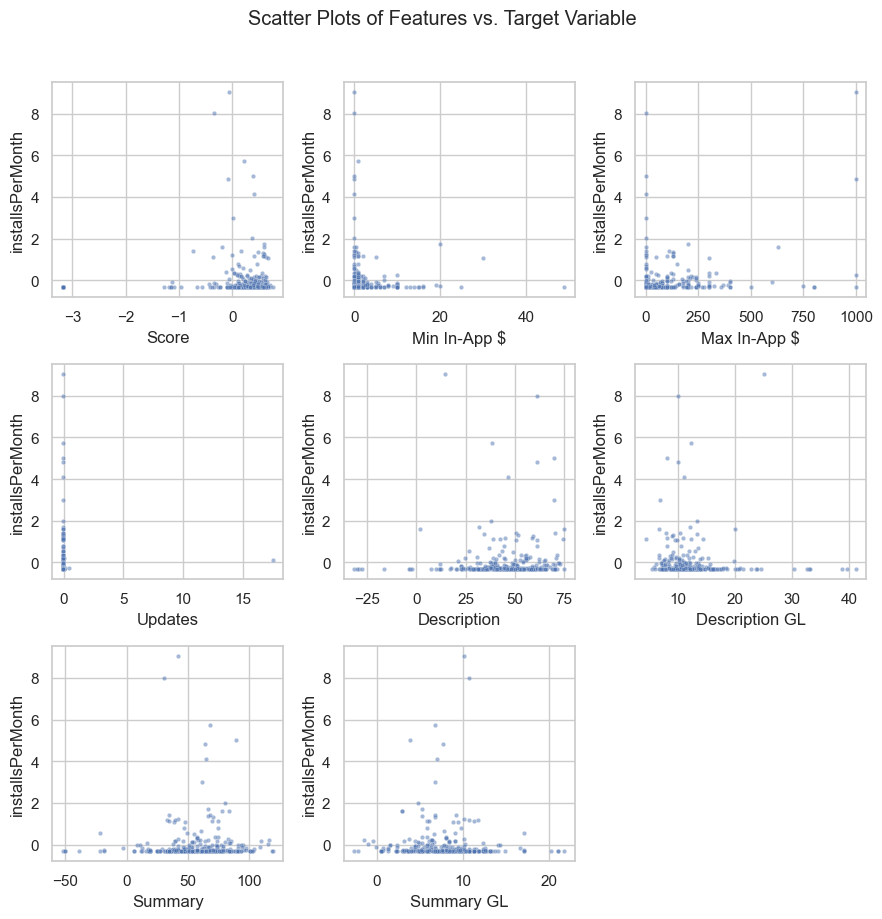

In [53]:
# create a grid of scatter plots to show the relationships with the target variable
import math

# Choose the feature columns (excluding the target)
features = [
    'score', 'minInAppProductPrice', 'maxInAppProductPrice',
    'updatesPerMonth', 'description_readability_score',
    'description_grade_level', 'summary_readability_score',
    'summary_grade_level'
]

import math

# Create a mapping of column names to friendly display names
friendly_names = {
    'score': 'Score',
    'minInAppProductPrice': 'Min In-App $',
    'maxInAppProductPrice': 'Max In-App $',
    'updatesPerMonth': 'Updates',
    'description_readability_score': 'Description',
    'description_grade_level': 'Description GL',
    'summary_readability_score': 'Summary',
    'summary_grade_level': 'Summary GL'
}

# Calculate number of features (excluding target)
n_features = len(features)

# Calculate grid dimensions for square layout
n_cols = math.ceil(math.sqrt(n_features))
n_rows = math.ceil(n_features / n_cols)

# Create subplots in square grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
axes = axes.flatten() if n_features > 1 else [axes]

# Create scatter plots
for i, feature in enumerate(features):
    # Get friendly names, fallback to original if not in mapping
    x_label = friendly_names.get(feature, feature)
    y_label = friendly_names.get(target_column, target_column)
    
    sns.scatterplot(data=df, x=feature, y=target_column, 
                   alpha=0.5, s=10, ax=axes[i])
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    # axes[i].set_title(f'{x_label} vs {y_label}')

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Scatter Plots of Features vs. Target Variable', y=1.02)
plt.tight_layout()
plt.show()

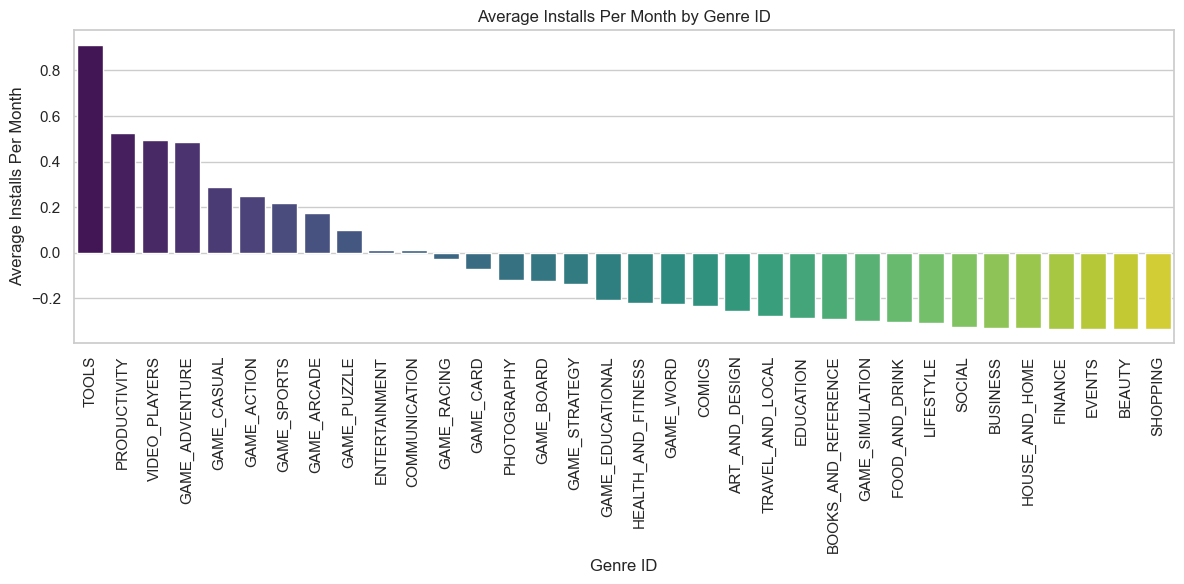

In [56]:
# create a chart of the average installs per month by genreId
avg_installs_by_genre = df.groupby('genreId')[target_column].mean().sort_values(ascending=False)            
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_installs_by_genre.index, y=avg_installs_by_genre.values, palette='viridis')
plt.title('Average Installs Per Month by Genre ID')
plt.xlabel('Genre ID')
plt.ylabel('Average Installs Per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


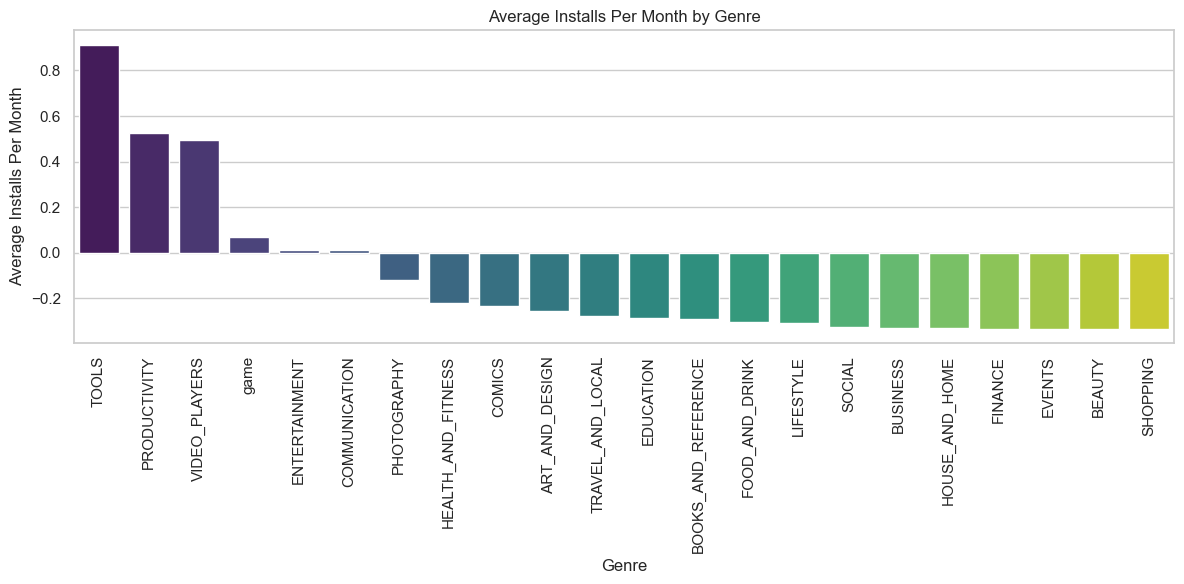

In [61]:
# Games are dominating the installs per month, so we will create a new column called genre that have the value 'game' if the genreId starts with 'game' and the value of the genreId otherwise
df['genre'] = df['genreId'].apply(lambda x: 'game' if x.startswith('GAME') else x)  

# create a chart of the average installs per month by genre
avg_installs_by_genre = df.groupby('genre')[target_column].mean().sort_values(ascending=False)            
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_installs_by_genre.index, y=avg_installs_by_genre.values, palette='viridis')
plt.title('Average Installs Per Month by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Installs Per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Genre counts:
genre
HEALTH_AND_FITNESS     44
game                   43
PRODUCTIVITY           38
EDUCATION              27
ENTERTAINMENT          25
VIDEO_PLAYERS          22
TRAVEL_AND_LOCAL       20
FOOD_AND_DRINK         19
ART_AND_DESIGN         17
PHOTOGRAPHY            12
BUSINESS               12
TOOLS                  11
SHOPPING                5
LIFESTYLE               5
FINANCE                 2
COMMUNICATION           1
SOCIAL                  1
BOOKS_AND_REFERENCE     1
COMICS                  1
HOUSE_AND_HOME          1
EVENTS                  1
BEAUTY                  1
Name: count, dtype: int64


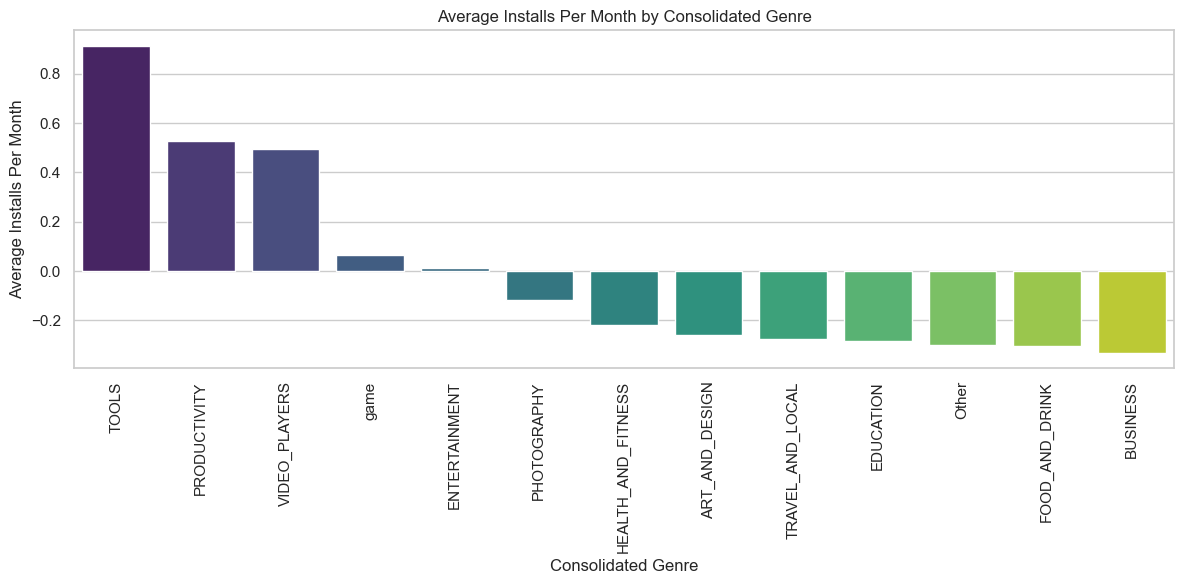

In [74]:
# several of the genres have very few apps, so we will consolidate the one with 10 or fewer apps into 'Other'
genre_counts = df['genre'].value_counts()
print(f"Genre counts:\n{genre_counts}") 
# create a new column called genre_consolidated that has the value of the genre if the count is greater than 10, otherwise 'Other'
df['genre_consolidated'] = df['genre'].apply(lambda x: x if genre_counts[x] > 10 else 'Other')
# create a chart of the average installs per month by genre_consolidated    
avg_installs_by_genre_consolidated = df.groupby('genre_consolidated')[target_column].mean().sort_values(ascending=False)            
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_installs_by_genre_consolidated.index, y=avg_installs_by_genre_consolidated.values, palette='viridis')
plt.title('Average Installs Per Month by Consolidated Genre')
plt.xlabel('Consolidated Genre')
plt.ylabel('Average Installs Per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

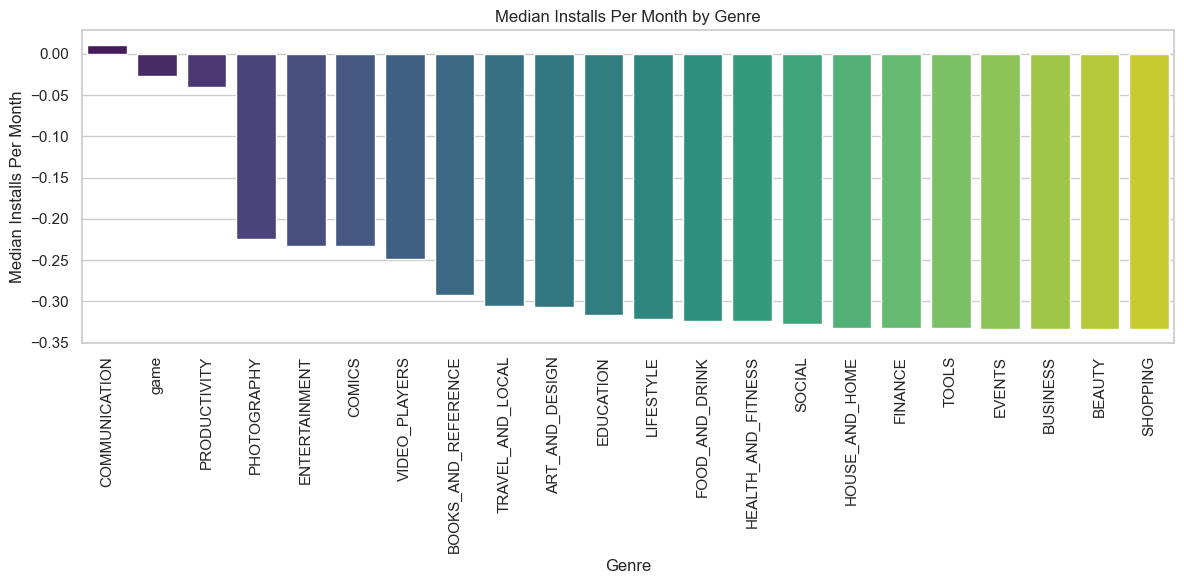

In [62]:
# create a chart of median installs per month by genre
median_installs_by_genre = df.groupby('genre')[target_column].median().sort_values(ascending=False)            
plt.figure(figsize=(12, 6))
sns.barplot(x=median_installs_by_genre.index, y=median_installs_by_genre.values, palette='viridis')
plt.title('Median Installs Per Month by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Installs Per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()   


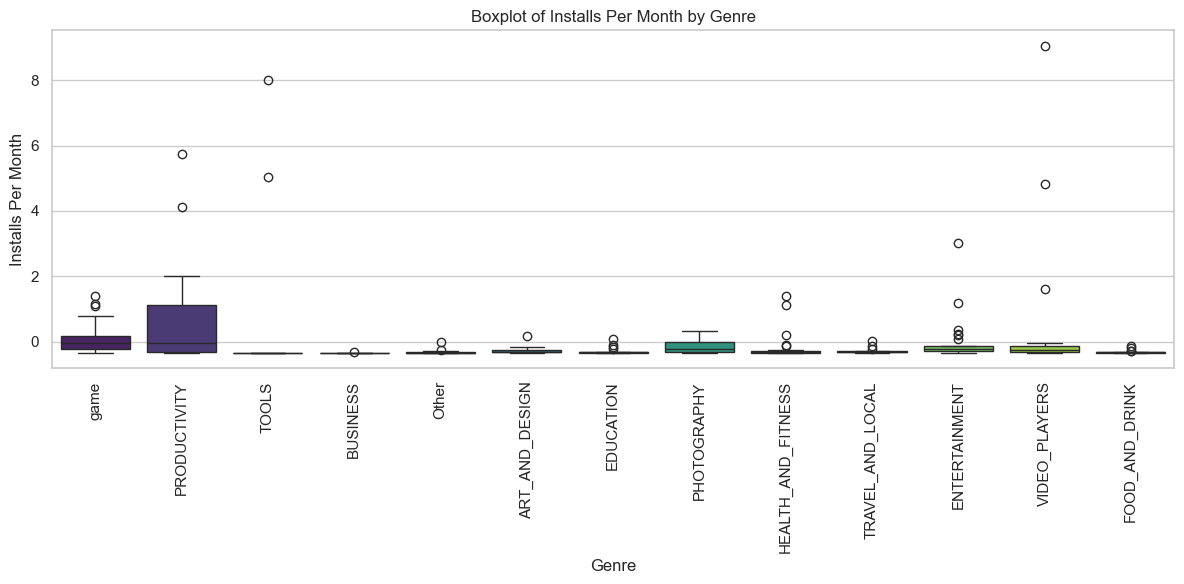

In [75]:
# create a chart of boxplots of installs per month by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_consolidated', y=target_column, data=df, palette='viridis')
plt.title('Boxplot of Installs Per Month by Genre')
plt.xlabel('Genre')
plt.ylabel('Installs Per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  


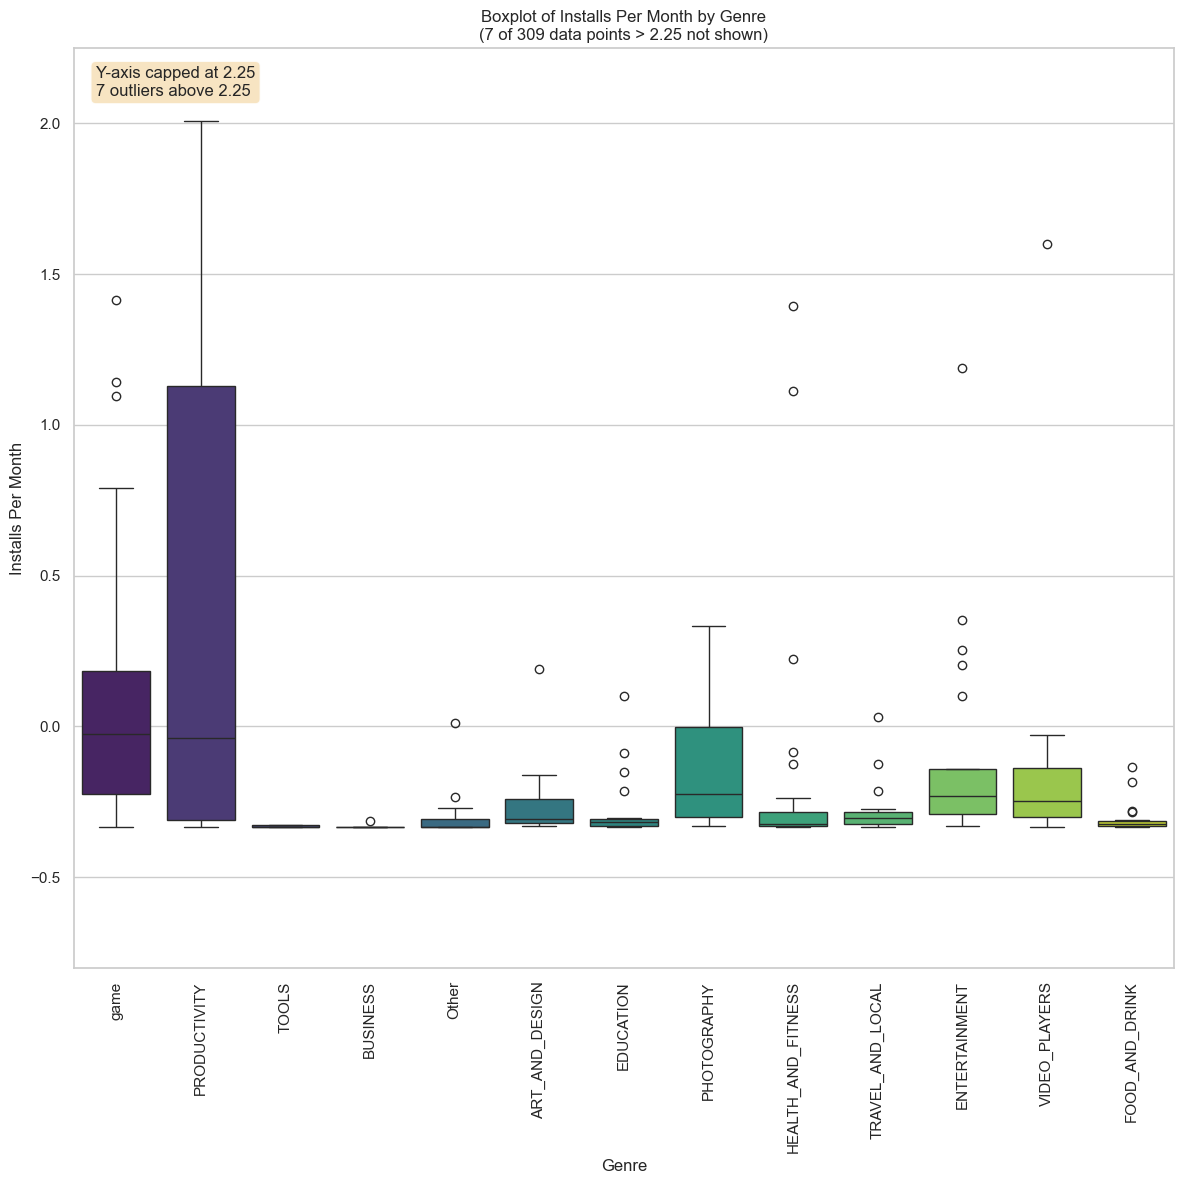

In [76]:
# Create a chart of boxplots of installs per month by genre
plt.figure(figsize=(12, 12))
sns.boxplot(x='genre_consolidated', y=target_column, data=df, palette='viridis')

# Set y-axis limit to 2.25
plt.ylim(bottom=None, top=2.25)

# Count and display outliers above 2.25
outliers_above_2 = (df[target_column] > 2.25).sum()
total_points = len(df)

plt.title(f'Boxplot of Installs Per Month by Genre\n({outliers_above_2} of {total_points} data points > 2.25 not shown)')
plt.xlabel('Genre')
plt.ylabel('Installs Per Month')
plt.xticks(rotation=90)

# Add a note about the truncation
plt.text(0.02, 0.98, f'Y-axis capped at 2.25\n{outliers_above_3} outliers above 2.25', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

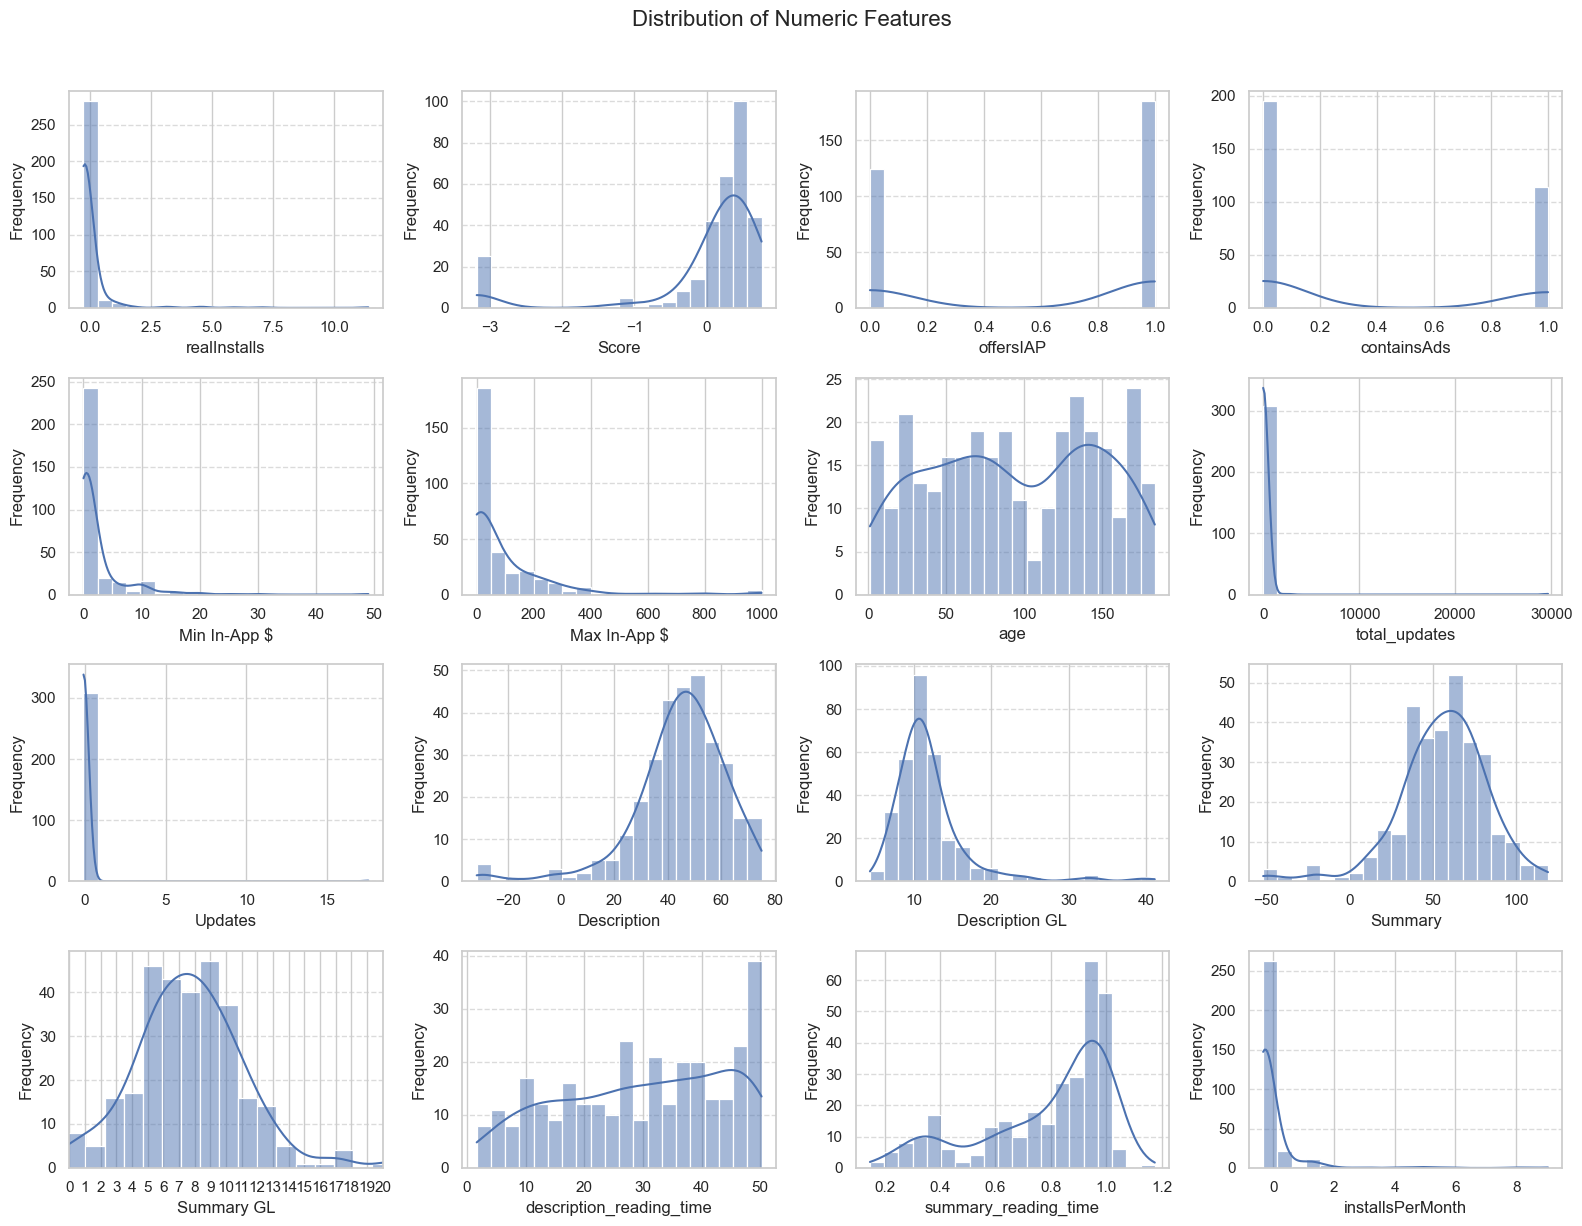

In [71]:

# Get numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate grid dimensions for square layout
n_features = len(numeric_columns)
n_cols = math.ceil(math.sqrt(n_features))
n_rows = math.ceil(n_features / n_cols)

# Create subplots in square grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten() if n_features > 1 else [axes]

# Create distribution plots
for i, column in enumerate(numeric_columns):
    # Get friendly name if you have the mapping from before
    display_name = friendly_names.get(column, column) if 'friendly_names' in locals() else column
    
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(display_name)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # You can add specific customizations for certain columns
    if column == 'summary_grade_level':
        axes[i].set_xlim(0, 20)
        axes[i].set_xticks(np.arange(0, 21, 1))

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

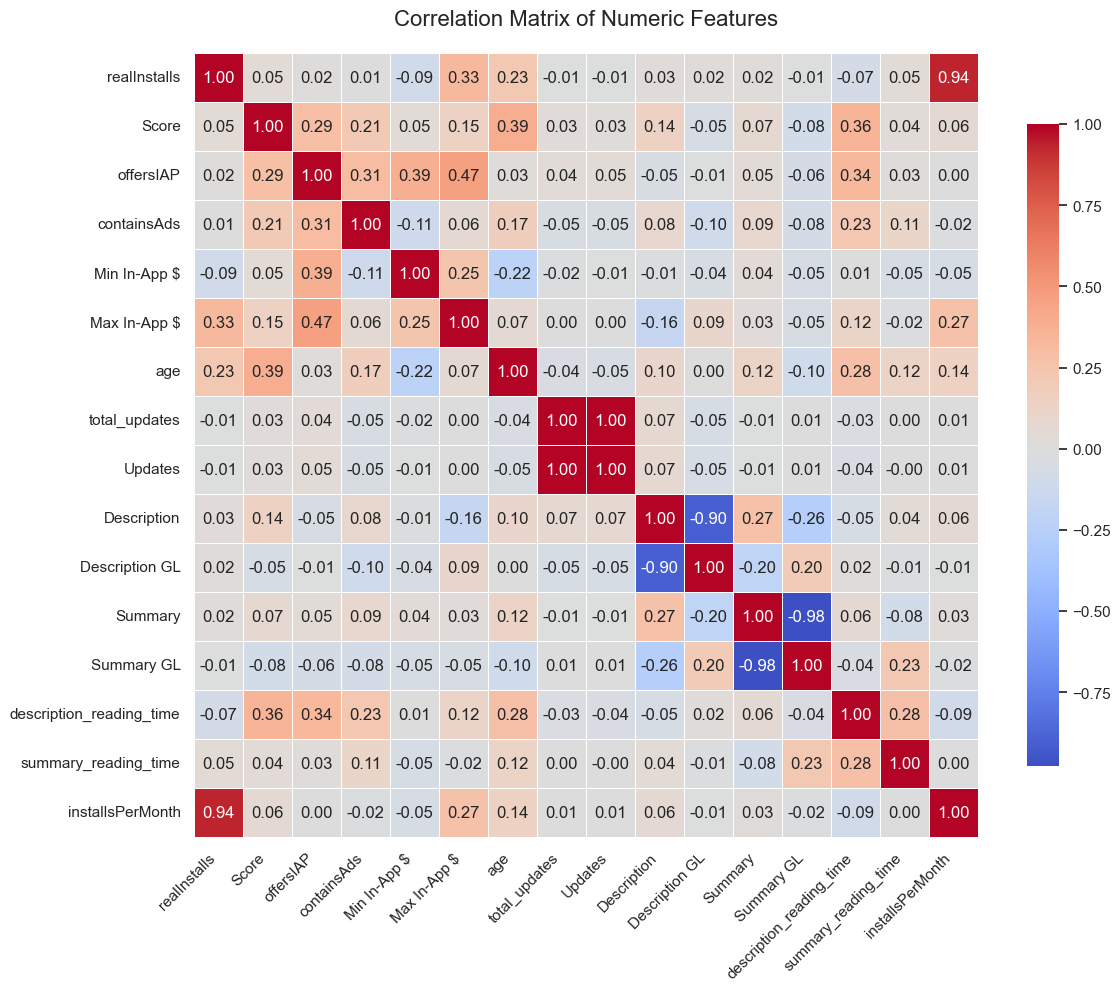

In [72]:
# Calculate correlation matrix for numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr()

# Apply friendly names if available
if 'friendly_names' in locals():
    # Rename index and columns with friendly names
    correlation_matrix.index = [friendly_names.get(col, col) for col in correlation_matrix.index]
    correlation_matrix.columns = [friendly_names.get(col, col) for col in correlation_matrix.columns]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            fmt='.2f')

plt.title('Correlation Matrix of Numeric Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [77]:
# make a copy of the dataframe in case my dummy encoding goes wrong
df_encoded = df.copy()

In [ ]:
# do full rank dummy encoding on the genre_consolidated column in the df_encoded dataframe
# df_encoded = pd.get_dummies(df_encoded, columns=['genre_consolidated'], drop_first=True)
# show the first 5 rows of the encoded dataframe
# print(df_encoded.head())
# change to boolean values of the genre_consolidated columns to integers
genre_columns = [col for col in df_encoded.columns if col.startswith('genre_consolidated_')]
for col in genre_columns:
    df_encoded[col] = df_encoded[col].astype(int)   
# show the first 5 rows of the encoded dataframe
print(df_encoded.head())


In [88]:
# make a list of the column names in the df_encoded dataframe that are not numeric
non_numeric_columns = df_encoded.select_dtypes(exclude=[np.number]).columns.tolist()
# print the non-numeric columns
print(f"Non-numeric columns: {non_numeric_columns}")    

Non-numeric columns: ['title', 'genreId', 'categories', 'contentRating', 'genre']


In [89]:
# make a copy of df_encoded jsut in case the encoding goes wrong
df_encoded_copy = df_encoded.copy()


In [ ]:
# drop the non-numeric columns from the df_encoded dataframe
df_encoded.drop(columns=non_numeric_columns, inplace=True)  
# show the first 5 rows of the encoded dataframe
print(df_encoded.head())


In [92]:
# export the df_encoded dataframe to a csv file
df_encoded.to_csv('google_play_apps_encoded.csv', index=False)  


In [ ]:
# make a chart of the columns in the df_encoded dataframe
plt.figure(figsize=(12, 6))
sns.countplot(data=df_encoded, x='genre_consolidated_Other', palette='viridis')
plt.title('Count of Other Genre Apps')

(309, 28)

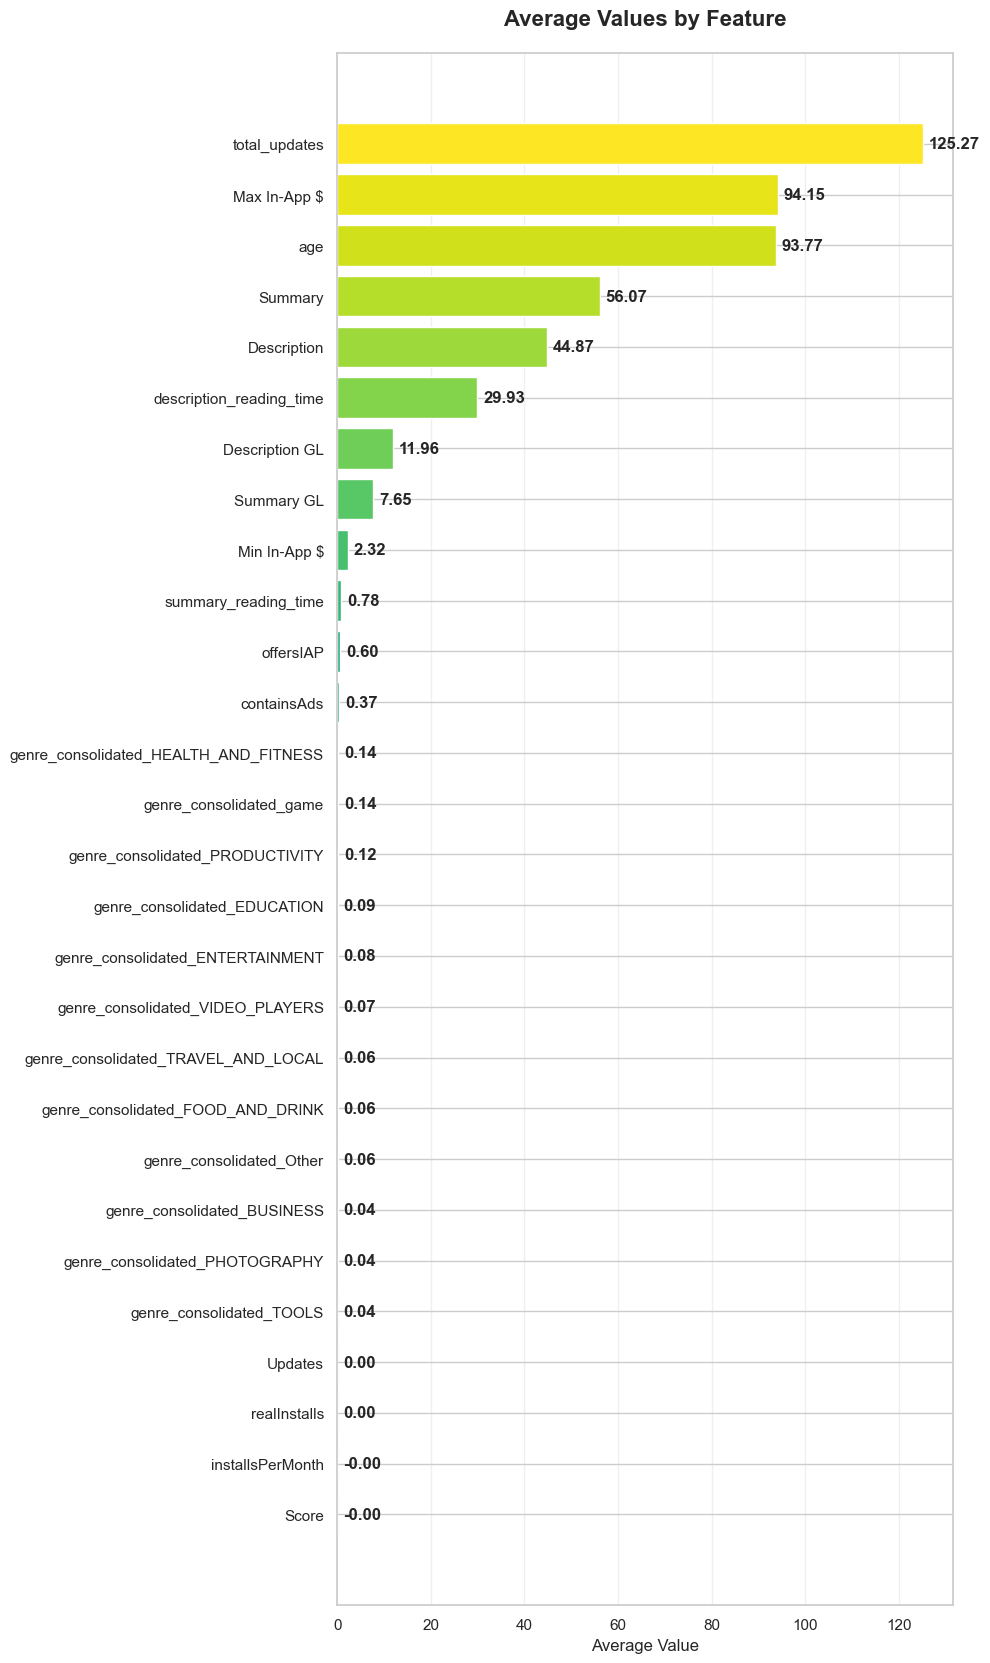

In [94]:
# Calculate averages for numeric columns
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
averages = df_encoded[numeric_columns].mean().sort_values(ascending=True)

# Apply friendly names if available
if 'friendly_names' in locals():
    display_names = [friendly_names.get(col, col) for col in averages.index]
else:
    display_names = averages.index

# Create horizontal bar chart
plt.figure(figsize=(10, len(averages) * 0.6))
bars = plt.barh(range(len(averages)), averages.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(averages))))

# Customize the chart
plt.yticks(range(len(averages)), display_names)
plt.xlabel('Average Value')
plt.title('Average Values by Feature', fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, averages.values)):
    plt.text(bar.get_width() + max(averages) * 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f}', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

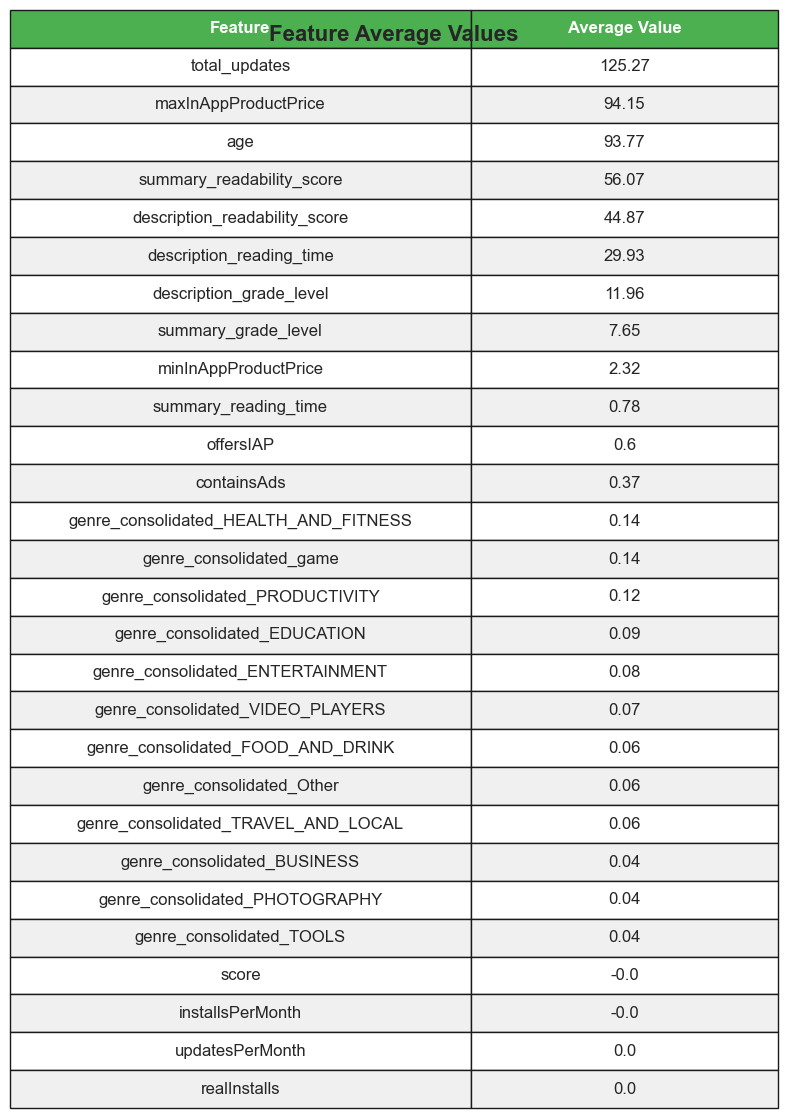

In [95]:
# Calculate averages
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
averages = df_encoded[numeric_columns].mean()

# Create summary dataframe
summary_df = pd.DataFrame({
    'Feature': [friendly_names.get(col, col) if 'friendly_names' in locals() else col 
                for col in averages.index],
    'Average Value': averages.values
}).round(2).sort_values('Average Value', ascending=False)

# Create styled table visualization
fig, ax = plt.subplots(figsize=(8, len(summary_df) * 0.4))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=summary_df.values,
                colLabels=summary_df.columns,
                cellLoc='center',
                loc='center',
                colWidths=[0.6, 0.4])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Color header
for i in range(len(summary_df.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(summary_df) + 1):
    for j in range(len(summary_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

plt.title('Feature Average Values', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

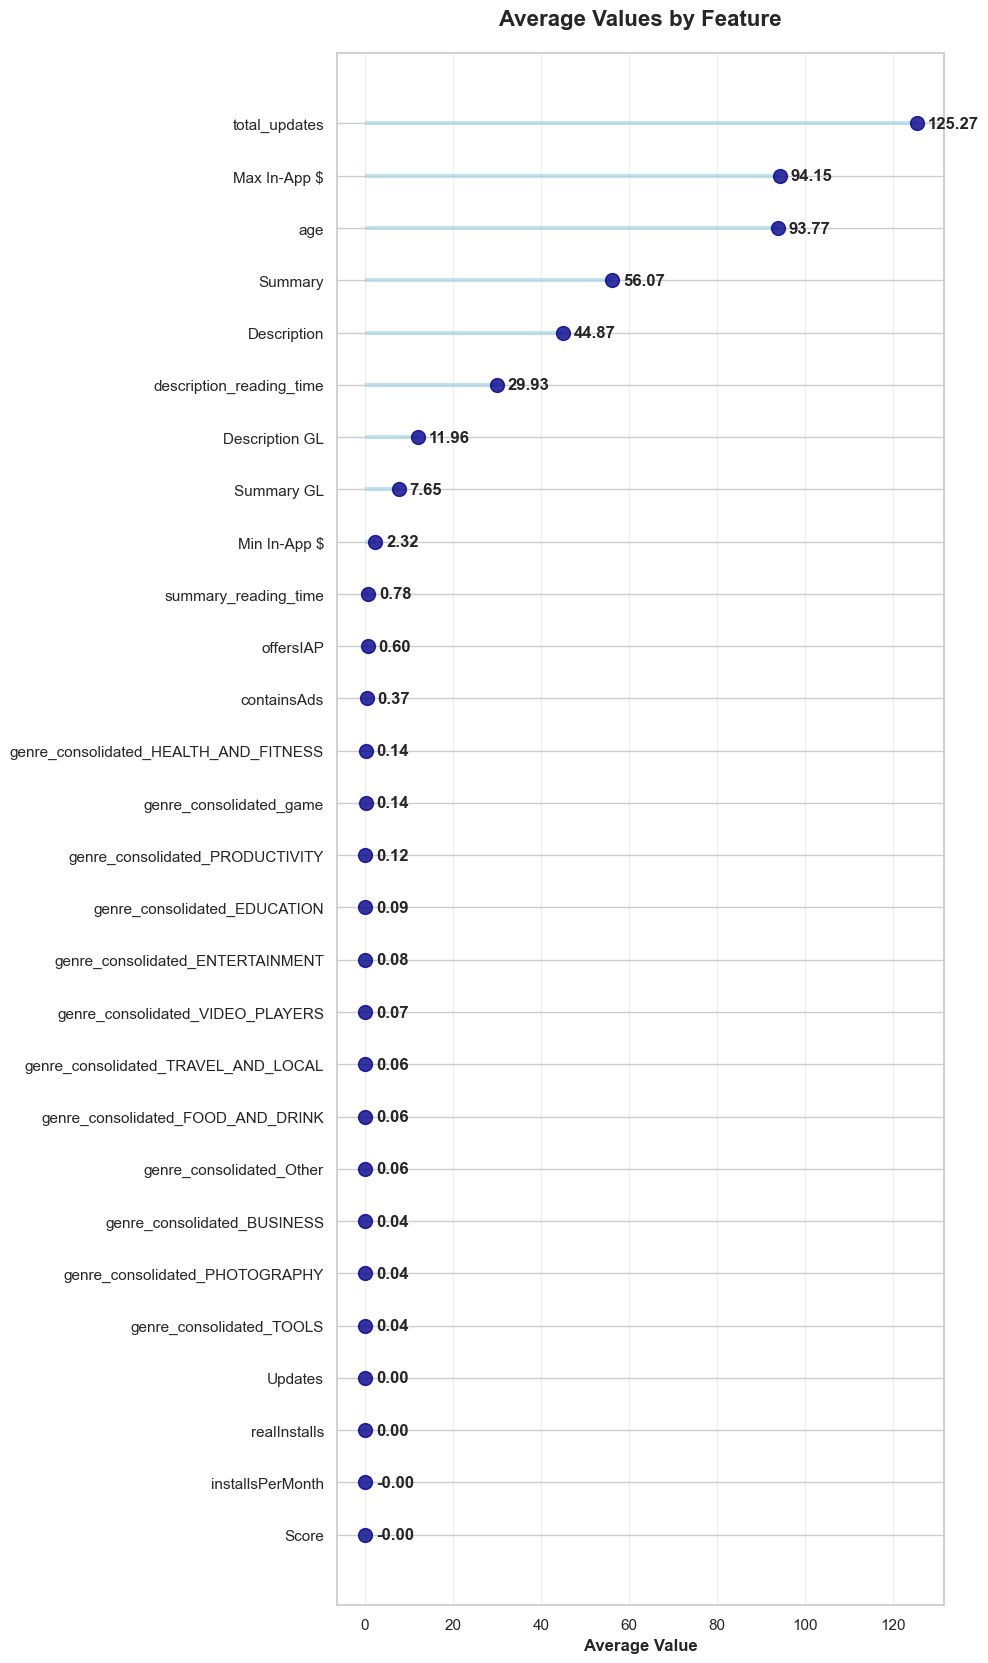

In [96]:
# Calculate averages
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
averages = df_encoded[numeric_columns].mean().sort_values(ascending=True)

# Apply friendly names
if 'friendly_names' in locals():
    display_names = [friendly_names.get(col, col) for col in averages.index]
else:
    display_names = averages.index

# Create lollipop chart
plt.figure(figsize=(10, len(averages) * 0.6))

# Create stems
plt.hlines(y=range(len(averages)), xmin=0, xmax=averages.values, 
           colors='lightblue', alpha=0.7, linewidth=3)

# Create dots
plt.scatter(averages.values, range(len(averages)), 
           color='darkblue', s=100, alpha=0.8, zorder=5)

# Customize
plt.yticks(range(len(averages)), display_names)
plt.xlabel('Average Value', fontsize=12, fontweight='bold')
plt.title('Average Values by Feature', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, value in enumerate(averages.values):
    plt.text(value + max(averages) * 0.02, i, f'{value:.2f}', 
             va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# drop the realInstalls column from the df_encoded dataframe
df_encoded.drop(columns=['realInstalls'], inplace=True)